<a href="https://colab.research.google.com/github/henriquehorton/php/blob/master/programa_manipulando_dicom_com_pydicom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Programa para Ler e analisar série de imagens dicom com pydicom

##Bibliotecas

Instalando bibliotecas

In [8]:
!pip install pydicom

Carregando bibliotecas

In [9]:
import pandas as pd
import pydicom
import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2

##Lendo arquivos dicom

função que lista arquivos de um diretório e salva em uma lista

In [10]:
def listar_pasta(pasta):
  lista = []
  print("Todos caminhos de arquivo da pasta {}" .format(pasta))
  for i in sorted(glob.glob(pasta)):
    print(i)
    dataset = pydicom.dcmread(i)
    # lista += [dataset.pixel_array]
    lista += [dataset]
  return lista

Chamando função

In [11]:
# Colocar asterisco (*) para listar todos arquivos do diretório
path = '/content/imagem/*'

lista_dicom = listar_pasta(path)

Todos caminhos de arquivo da pasta /content/imagem/*
/content/imagem/PIG002_00508.CT.SPECIALS_UTI_ANIMAIS_(ADULT).0015.0071.2014.02.27.16.50.49.812500.73736857.IMA
/content/imagem/PIG002_00508.CT.SPECIALS_UTI_ANIMAIS_(ADULT).0015.0072.2014.02.27.16.50.49.812500.73736879.IMA
/content/imagem/PIG002_00508.CT.SPECIALS_UTI_ANIMAIS_(ADULT).0015.0109.2014.02.27.16.50.49.812500.73737779.IMA
/content/imagem/PIG002_00508.CT.SPECIALS_UTI_ANIMAIS_(ADULT).0015.0110.2014.02.27.16.50.49.812500.73737801.IMA


Lendo pixels das imagens

In [12]:
img1 = (lista_dicom[0].pixel_array*lista_dicom[0].RescaleSlope) + lista_dicom[0].RescaleIntercept
img2 = (lista_dicom[1].pixel_array*lista_dicom[1].RescaleSlope) + lista_dicom[1].RescaleIntercept
img3 = (lista_dicom[2].pixel_array*lista_dicom[2].RescaleSlope) + lista_dicom[2].RescaleIntercept
img4 = (lista_dicom[3].pixel_array*lista_dicom[3].RescaleSlope) + lista_dicom[3].RescaleIntercept 

##Plotando Imagens

função para plotar imagens em 2x2

In [13]:
def grafico_2x2(img1,img2,img3,img4):
  fig, ax = plt.subplots(2,2,figsize=(15,10))
  im1 = ax[0,0].imshow(img1)
  ax[0,0].set_title('Cranial 1')
  fig.colorbar(im1, ax=ax[0,0])
  im2 = ax[0,1].imshow(img2)
  ax[0,1].set_title('Caudal 1')
  fig.colorbar(im1, ax=ax[0,1])
  im3 = ax[1,0].imshow(img3)
  ax[1,0].set_title('Cranial 2')
  fig.colorbar(im1, ax=ax[1,0])
  im4 = ax[1,1].imshow(img4)
  ax[1,1].set_title('Caudal 2')
  fig.colorbar(im1, ax=ax[1,1])
  plt.show()

Plotando e visualizando imagens

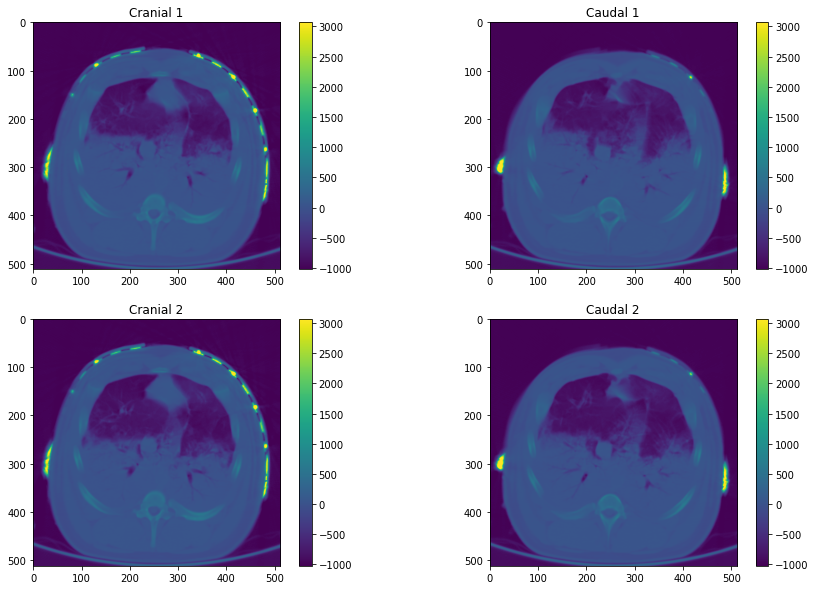

In [14]:
grafico_2x2(img1,img2,img3,img4)

##Segmentar Pulmão



A segmentação serve para separar o orgão, no caso o pulmão, do restante da imagem

### 1# Eliminar valores extremos

Definir um seed como valor mínimo, assim criando array binário (True or False) 

In [15]:
seed = -100
img1_bin = (img1 < seed) * 1
img2_bin = (img2 < seed) * 1
img3_bin = (img3 < seed) * 1
img4_bin = (img4 < seed) * 1

Plotando gráfico com imagem em array binária

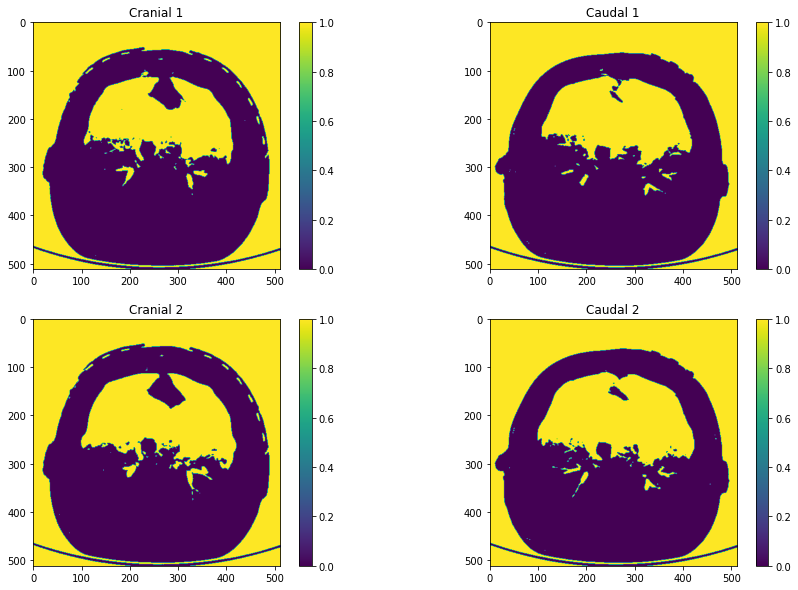

In [16]:
grafico_2x2(img1_bin,img2_bin,img3_bin,img4_bin)

### 2# Isolando centro da imagem

Função para criar uma mascara circular central.

In [17]:
# Função para isolar imagem com circulo central
def img_isolada(img):
  mascara = np.zeros(img.shape[:2], dtype = "uint8")
  (cX, cY) = (img.shape[1] // 2, img.shape[0] // 2)
  cv2.circle(mascara, (cX, cY), 180, 255, -1)
  return cv2.bitwise_and(img, img, mask = mascara)

executando função

In [18]:
img1_isolada = img_isolada(img1_bin)
img2_isolada = img_isolada(img2_bin)
img3_isolada = img_isolada(img3_bin) 
img4_isolada = img_isolada(img4_bin)

Plotando gráfico com imagem circular central

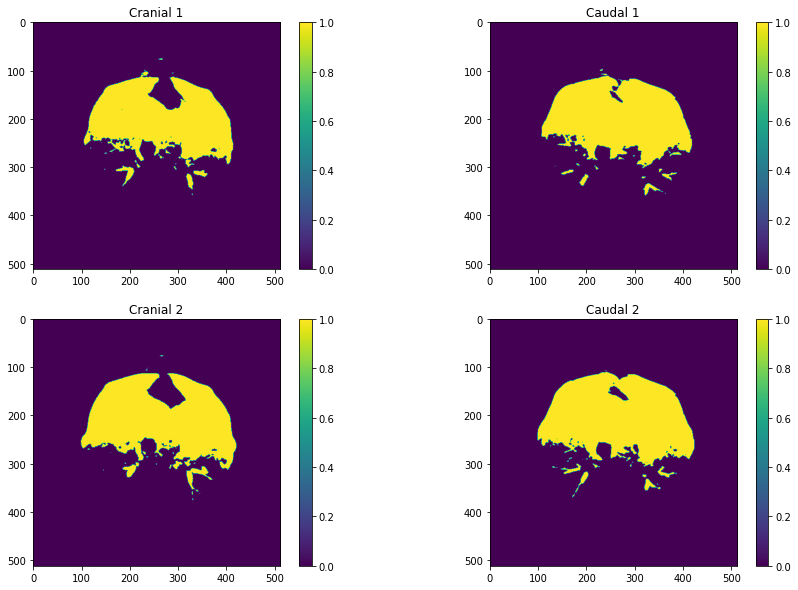

In [19]:
grafico_2x2(img1_isolada,img2_isolada,img3_isolada,img4_isolada)

### 3# Abertura

Função para abertura da imagem

In [20]:
#.astype('uint8') serve para ler um vetor grande
img1_isolada = img1_isolada.astype('uint8')
img2_isolada = img2_isolada.astype('uint8')
img3_isolada = img3_isolada.astype('uint8')
img4_isolada = img4_isolada.astype('uint8')

seed = (6,6)
kernel = np.ones(seed,np.uint8)

img1_aberta = cv2.morphologyEx(img1_isolada, cv2.MORPH_OPEN, kernel)
img2_aberta = cv2.morphologyEx(img2_isolada, cv2.MORPH_OPEN, kernel)
img3_aberta = cv2.morphologyEx(img3_isolada, cv2.MORPH_OPEN, kernel)
img4_aberta = cv2.morphologyEx(img4_isolada, cv2.MORPH_OPEN, kernel)

Plotando gráfico com imagem pós abertura

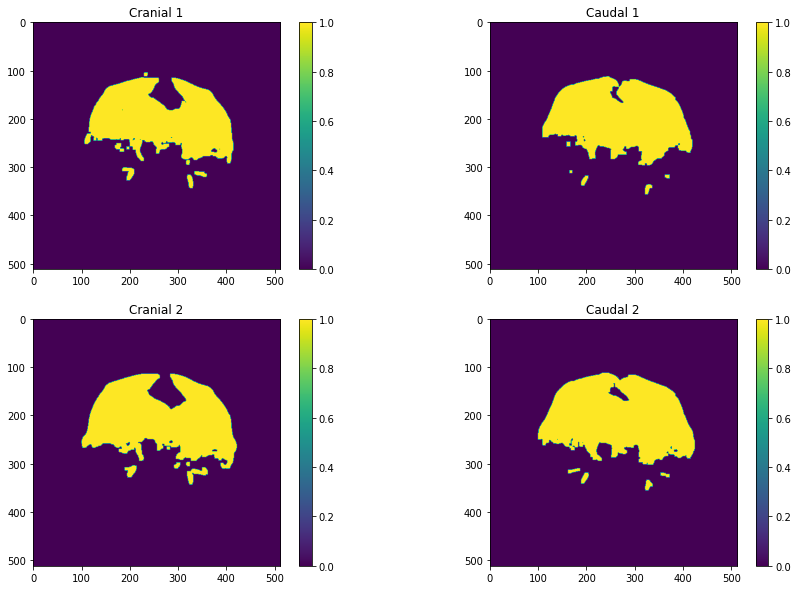

In [21]:
grafico_2x2(img1_aberta,img2_aberta,img3_aberta,img4_aberta)

### 4# Fechamento

Função para fechamento da imagem

In [22]:
img1_aberta = img1_aberta.astype('uint8')
img2_aberta = img2_aberta.astype('uint8')
img3_aberta = img3_aberta.astype('uint8')
img4_aberta = img4_aberta.astype('uint8')

# seed = (3,3)
kernel = np.ones(seed,np.uint8)

img1_fechada = cv2.morphologyEx(img1_aberta, cv2.MORPH_CLOSE, kernel)
img2_fechada = cv2.morphologyEx(img2_aberta, cv2.MORPH_CLOSE, kernel)
img3_fechada = cv2.morphologyEx(img3_aberta, cv2.MORPH_CLOSE, kernel)
img4_fechada = cv2.morphologyEx(img4_aberta, cv2.MORPH_CLOSE, kernel)

Plotando gráfico com imagem pós fechamento

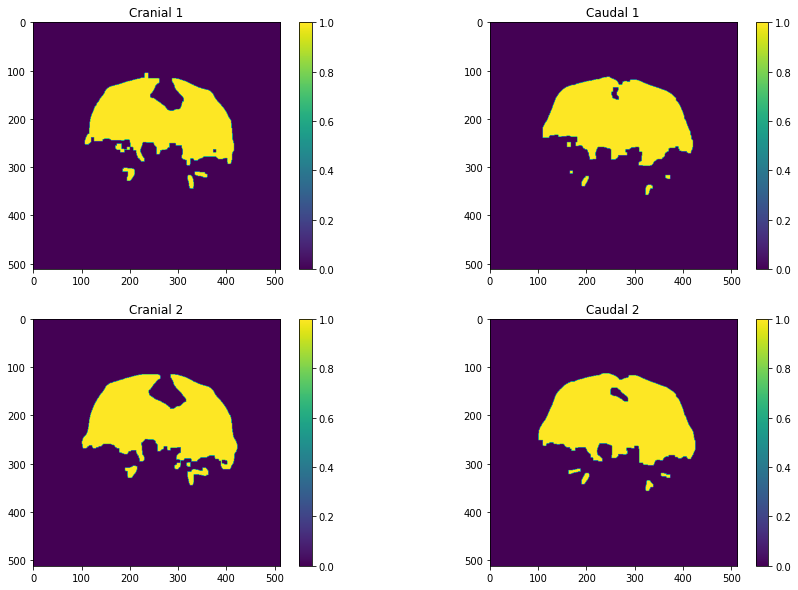

In [23]:
grafico_2x2(img1_fechada,img2_fechada,img3_fechada,img4_fechada)

### 5# Pulmão segmentado

Juntar máscara e imagem do pulmão

In [24]:
img1_segmentada = ((img1_fechada * img1) < 0 )* img1
img2_segmentada = ((img2_fechada * img2) < 0 )* img2
img3_segmentada = ((img3_fechada * img3) < 0 )* img3
img4_segmentada = ((img4_fechada * img4) < 0 )* img4

Plotando gráfico com imagem do pulmão segmentado

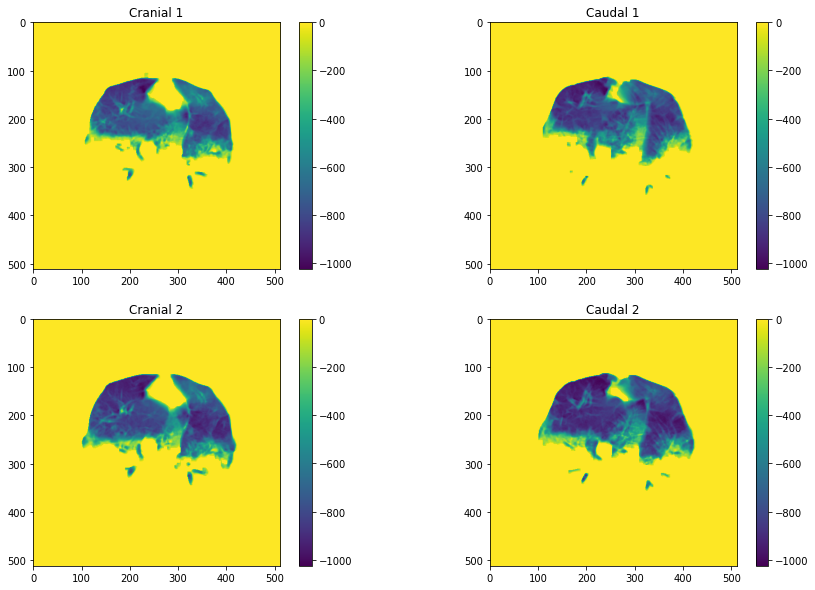

In [25]:
grafico_2x2(img1_segmentada, img2_segmentada, img3_segmentada, img4_segmentada)

##Análise dos dados de cada imagem

A analise de dados, a partir de gráficos, ajudará a identificar em qual fase cada corte do pulmão se encontra: Inspiração ou Expiração

###Histogramas

Função para criar lista com valores HU e Eliminar zeros

In [26]:
def val_da_segm(img_segmentada):
  filtro = img_segmentada.ravel() < 0    
  return img_segmentada.ravel()[filtro]

Plotando Histograma dos valores de HU do pulmão segmentado

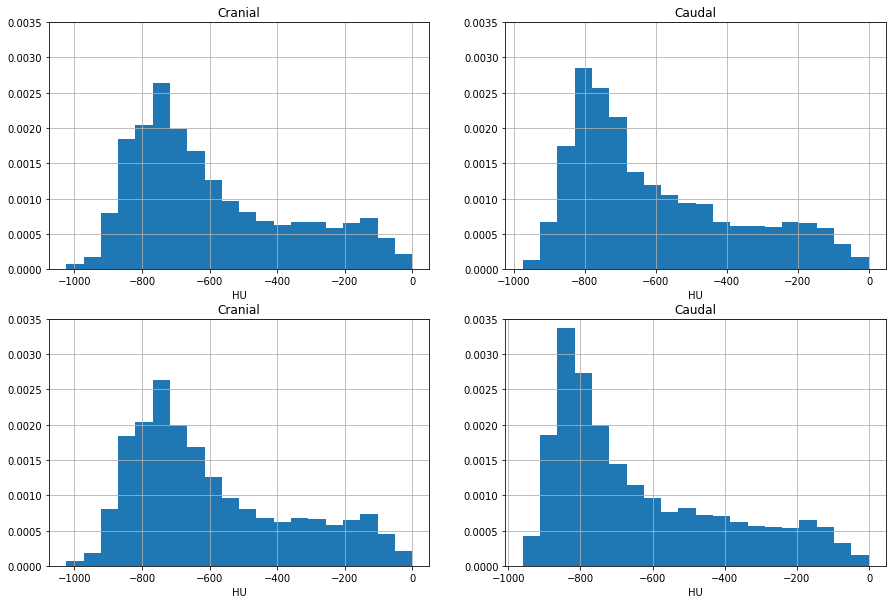

In [27]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].hist(val_da_segm(img1_segmentada),bins=20,density=True)
ax[0,0].set_title('Cranial')
ax[0,1].hist(val_da_segm(img2_segmentada),bins=20,density=True)
ax[0,1].set_title('Caudal')
ax[1,0].hist(val_da_segm(img1_segmentada),bins=20,density=True)
ax[1,0].set_title('Cranial')
ax[1,1].hist(val_da_segm(img4_segmentada),bins=20,density=True)
ax[1,1].set_title('Caudal')

for i in ax:  
  for e in i:
    e.grid(True)
    e.set_xlabel('HU')
    e.set_ylim(0,0.0035)
             
plt.show()

Plotando Histograma sobrepostos

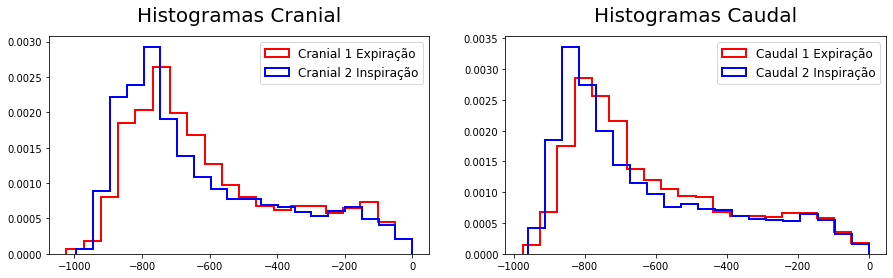

In [28]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
ax[0].hist(val_da_segm(img1_segmentada),bins=20,density=True, color='r',histtype='step',linewidth=2)
ax[0].hist(val_da_segm(img3_segmentada),bins=20,density=True, color='b',histtype='step',linewidth=2)
ax[0].legend(('Cranial 1 Expiração','Cranial 2 Inspiração'), fontsize=12)
ax[0].set_title('Histogramas Cranial', fontsize=20, pad=15)
ax[1].hist(val_da_segm(img2_segmentada),bins=20,density=True, color='r',histtype='step',linewidth=2)
ax[1].hist(val_da_segm(img4_segmentada),bins=20,density=True, color='b',histtype='step',linewidth=2)
ax[1].legend(('Caudal 1 Expiração','Caudal 2 Inspiração'), fontsize=12)
ax[1].set_title('Histogramas Caudal', fontsize=20, pad=15)

plt.show()

###Gráfico de linha

Salvar média dos valores HU de todas imagens, separados em cranial e caudal

In [29]:
imagem_cranial = img1_segmentada.mean(),img3_segmentada.mean()
imagem_caudal = img2_segmentada.mean(),img4_segmentada.mean()

Plotando Gráfico de linhas das fases do pulmão

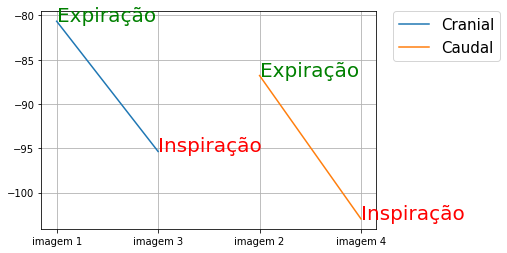

In [30]:
plt.plot(('imagem 1','imagem 3'),imagem_cranial, label="Cranial")
plt.plot(('imagem 2','imagem 4'),imagem_caudal, label="Caudal")
plt.annotate('Expiração',xy=('imagem 1',imagem_cranial[0]), fontsize=20, color='g')
plt.annotate('Inspiração',xy=('imagem 3',imagem_cranial[1]), fontsize=20, color='r')
plt.annotate('Expiração',xy=('imagem 2',imagem_caudal[0]), fontsize=20, color='g')
plt.annotate('Inspiração',xy=('imagem 4',imagem_caudal[1]), fontsize=20, color='r')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=15 )
plt.grid()

###Conlusão

Criando função para sequência do processo de segmentação

In [31]:
def grafico_2x5(img,img_isolada,img_aberta,img_fechada,img_segmentada):
  fig, ax = plt.subplots(1,5,figsize=(20,10))
  im1 = ax[0].imshow(img)
  ax[0].set_title('Cranial 1')
  im2 = ax[1].imshow(img_isolada)
  ax[1].set_title('Removendo fundo')
  im3 = ax[2].imshow(img_aberta)
  ax[2].set_title('Abertura')
  im4 = ax[3].imshow(img_fechada)
  ax[3].set_title('Fechamento')
  im4 = ax[3].imshow(img_fechada)
  ax[3].set_title('Fechamento')
  im5 = ax[4].imshow(img_segmentada)
  ax[4].set_title('Segmentada')
  plt.show()

Imagem Cranial Expiração e Inspiração

Imagem Cranial Expiração


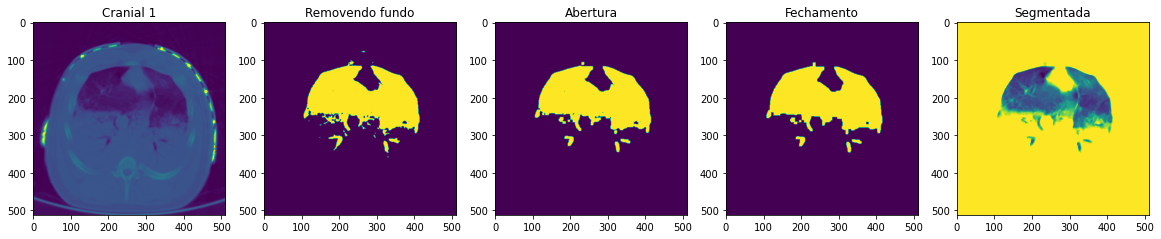


 Imagem Cranial Inspiração


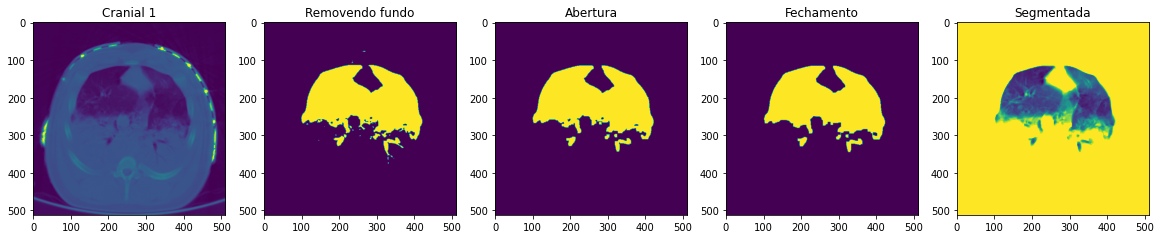

In [32]:
print('Imagem Cranial Expiração')
grafico_2x5(img1,img1_isolada,img1_aberta,img1_fechada,img1_segmentada)
print('\n Imagem Cranial Inspiração')
grafico_2x5(img3,img3_isolada,img3_aberta,img3_fechada,img3_segmentada)


Imagem Caudal Expiração e Inspiração

Imagem Caudal Expiração


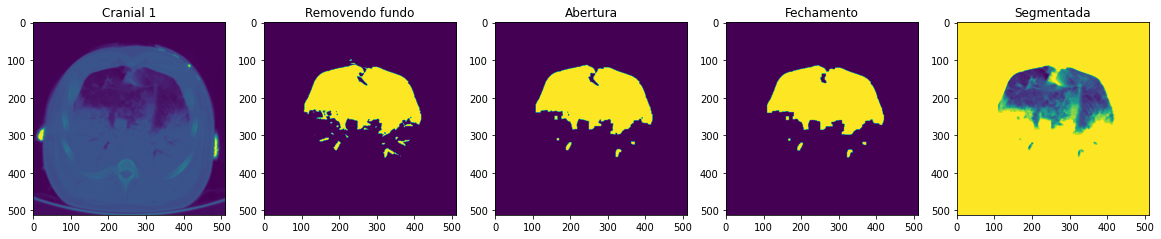


 Imagem Cauldal Inspiração


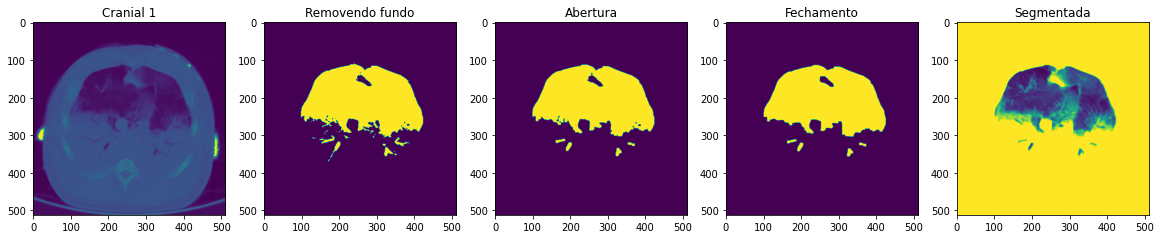

In [33]:
print('Imagem Caudal Expiração')
grafico_2x5(img2,img2_isolada,img2_aberta,img2_fechada,img2_segmentada)
print('\n Imagem Cauldal Inspiração')
grafico_2x5(img4,img4_isolada,img4_aberta,img4_fechada,img4_segmentada)


* Imagem 01  = Cranial em fase de Expiração
* Imagem 02  = Caudal em fase de Expiração
* Imagem 03  = Cranial em fase de Inspiração
* Imagem 04  = Caudal em fase de Inspiração


##Estimar a massa de pulmão e o volume de ar nas imagens de CT

###Encontrando o volume do voxel em cm³

In [34]:
#achar as dimensões
espessura = lista_dicom[0].SliceThickness
larg , alt = lista_dicom[0].PixelSpacing

#Multiplicar as 3 dimensões
vol_vox = float(larg)*float(alt)*float(espessura)/1e3

print("O volume do Voxel é de: {}cm³ " .format(vol_vox))

O volume do Voxel é de: 0.002288818359375cm³ 


###Quociente de CT escalado CTQ

In [41]:
img1_CTQ = img1.astype('int')+1024
img2_CTQ = img2.astype('int')+1024
img3_CTQ = img3.astype('int')+1024
img4_CTQ = img4.astype('int')+1024

###Massa relativa para cada elemento da matriz (CTQ * Volume do voxel)

In [49]:
img1_massa = img1_CTQ*vol_vox
img2_massa = img2_CTQ*vol_vox
img3_massa = img3_CTQ*vol_vox
img4_massa = img4_CTQ*vol_vox

###Densidade relativa para cada elemento da matriz (Fórmula)

---


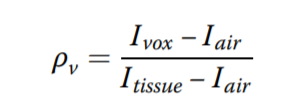

In [73]:
def form_dens(img_x):
  pv = []
  s = 0 
  for i in img_x.astype('int'):
    for e in i:
      pv.append(((e+1000)/(s+1000)))
  pv = np.array(pv) 
  return pv.reshape(img_x.shape)

In [ ]:
# def form_dens(img_x):
#   pv = []
#   s = 0 
#   for i in img_x.astype('int'): 
#     pv.append(((i+1000)/(s+1000)))
#   pv = np.array(pv) 
#   return pv

In [77]:
img1_voxel_dens_form = form_dens(img1)
img2_voxel_dens_form = form_dens(img2)
img3_voxel_dens_form = form_dens(img3)
img4_voxel_dens_form = form_dens(img4)

###Plotar 

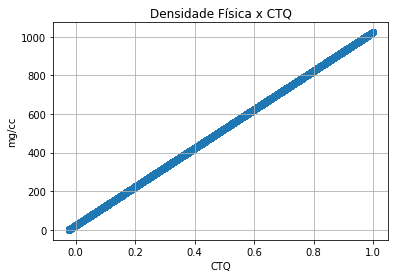

In [78]:
plt.scatter(img1_voxel_dens_form[img1_segmentada<0],img1_CTQ[img1_segmentada<0])
plt.xlabel('CTQ')
plt.ylabel('mg/cc')
plt.title('Densidade Física x CTQ')
plt.grid()